# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; and
5. Create meaningful visualizations to analyze the data!
---

## Important Dates

- Homework release: Fri 2 Oct 2020
- **Homework due**: Fri 16 Oct 2020, 23:59
- Grade release: Fri 23 Oct 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the `data` folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in either comments or markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.



## Context

The coronavirus pandemic has led to the implementation of unprecedented non-pharmaceutical interventions ranging from case isolation to national lockdowns. These interventions, along with the disease itself, have created massive shifts in people’s lives. For instance, in mid-May 2020, more than one third of the global population was under lockdown, and millions have since lost their jobs or have moved to work-from-home arrangements.


Importantly, the disease has shifted people's [needs](https://en.wikipedia.org/wiki/Toilet_paper), [interests](https://en.wikipedia.org/wiki/TikTok), and [concerns](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Switzerland) across the globe.

In this homework, we will take a deep dive into Wikipedia data and try to uncover what changed with the pandemic. More specifically, we will be focusing on Wikipedia pageviews, that is, how many people read each article on Wikipedia each day.
A nice graphical user interface for playing with Wikipedia pageviews is available [here](https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=Cat|Dog).
Also, the Wikimedia Foundation releases dump files with the number of pageviews per article across all Wikimedia websites, including Wikipedia in all its language editions [(amazing, right?)](https://dumps.wikimedia.org/other/pagecounts-ez/). 

#### But wait, what is a pageview?

> A pageview or page view, abbreviated in business to PV and occasionally called page impression, is a request to load a single HTML file (web page) of an Internet site. On the World Wide Web, a page request would result from a web surfer clicking on a link on another page pointing to the page in question. (Source: [Wikipedia article "Pageviews"](https://en.wikipedia.org/wiki/Pageview))

Pageviews in Wikipedia can tell us that people are looking for certain information online. Analyzing how the volume and the distribution of pageviews changed can tell us about how the behavior of Wikipedia readers has changed.

In this homework, you will take a deep dive into analyzing Wikipedia pageview logs and uncover shifts in interests associated with the current pandemic.

---

## The data

First, you need to download a **meraviglioso** dataset from the Italian Wikipedia that we prepared for you. The structure of the data is described next. 

**The dataset is available in the `data` directory pushed to the same GitHub repo as the homework**. Inside of the data directory, you will find three files:

### `articles.tsv.gz`

This is a tab-separated file containing daily pageviews for a subset of the articles from Italian Wikipedia. It is compressed! Each row corresponds to a different article, and each column (except the first) corresponds to the number of pageviews this article received on a given day. The example below shows the structure for two of the things [Kristina Gligorić](https://kristinagligoric.github.io/), one of your TAs, likes the most on her Pizza:

**Example:**
~~~
index       2018-01-01 00:00:00    2018-01-02 00:00:00 (...)
Formaggio   100                    101                 (...)
Ananas      12                     54                  (...)
(...)       (...)                  (...)
~~~


### `topics.jsonl.gz`

This is a classification of which topics an article belongs to, according to a model released by the Wikimedia Foundation (the classes are derived from this [taxonomy](https://www.mediawiki.org/wiki/ORES/Articletopic)). Importantly, this file was obtained from English Wikipedia, while the previous one contains articles from the Italian Wikipedia. This is important because article titles in the Italian Wikipedia are in Italian, while article titles in the English page are in English (duh!). In any case, each line contains a .json object with
the English name of the article (name);
1. the English name of the article (`name`);
2. a set of fields related to topics themselves. Each of these fields is set as either `True` (if the article belongs to this topic) or `False` (if it does not). Notice that the same article may belong to multiple topics. 

**Example:**
~~~
{"index": "Cheese", "Culture.Food and drink": True, "Culture.Literature": False (...)}
{"index": "Pineapple", "Culture.Food and drink": True, "Culture.Literature": False (...)}
(...)
~~~

 
### `mapping.pickle`

This is a `.pickle` file, that is, a serialized Python object. You can read about Python pickles  [here](https://wiki.python.org/moin/UsingPickle), 
but in short: the default Python library `pickle` allows you to save and load Python objects to and from disk. This is one object saved via the pickle library: a Python dictionary containing a mapping between the English names and the Italian names of Wikipedia articles:

**Example:**
~~~
{
    "Cheese": "Formaggio",
    "Ananas": "Pineapple"
    (...)
}
~~~
---


## _Step 1:_ Loading the data

---
### **Task 1**

Your first task is to load all these datasets into memory using pandas and pickle. 
**You should load the files compressed.**

Here, the files at hand are rather small, and you could easily uncompress  the files to disk and work with them as plain text. 
Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, this will often not be the case.

Then, working with compressed files is key so that you don't receive e-mail from your (often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your datasets. 
Another big advantage of compressing files is to simply read files faster. You will often find that reading compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading and writing to the disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

 
---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). Check the `error_bad_lines` parameter on `read_csv`.

In [1]:
from IPython.display import display
import pandas as pd
import pickle
import os

### ~ 1.1

path = os.getcwd()
data_path = os.path.join(path,"data")
files = sorted(os.listdir(data_path))            # sort alphabetically

for file in files:   
    if ".tsv.gz" in file:
        print("loading {}".format(file))
        globals()[file.split(".")[0]] =\
        pd.read_csv(os.path.join(data_path,file), sep='\t', error_bad_lines=False) 
    
    elif ".jsonl.gz" in file:
        print("loading {}".format(file))
        globals()[file.split(".")[0]] =\
        pd.read_json(os.path.join(data_path,file),orient='records', lines = True) 

    elif ".pickle" in file:
        print("loading {}".format(file))
        globals()[file.split(".")[0]] =\
        pickle.load(open(os.path.join(data_path,file),'rb'))
        
    else:
        print("Problem loading {}".format(file))
            

Problem loading .DS_Store
Problem loading articles.tsv
loading articles.tsv.gz


b'Skipping line 7: expected 944 fields, saw 945\n'


loading mapping.pickle
Problem loading topics.jsonl
loading topics.jsonl.gz


We read every file in `data` folder since we will need each of them for this homework. As the hint suggests, we need to have `error_bad_lines` argument as false because line 7 of `articles` has one field less than others. Opening `topics` with a text editor, we can see that the there is one dictionnary by line and that the format is of the style: {column:value, column:value, ...} for each line, which makes `line` argument as `True` and orient `argument` as `'records'`. The default compression agrument of `read_csv` and `read_json` is `'infer'` which starts to try to detect `.gz`formats, so leaving no compression argument leads to a correct reading of the data.

## _Step 2:_ Filtering the data

---
### **Task 2**

Oh no! Something seems wrong with your dataframe!
It seems that some of the lines in the `articles.tsv.gz` are weird! 
They have titles in the format `"Discussione:name_of_the_page"`.

Unsure of what they mean, you ask about them in the [Wiki-research mailing list](https://lists.wikimedia.org/mailman/listinfo/wiki-research-l).
Twenty minutes later a kind internet stranger comes with an answer! 
She tells you that these are talk pages, where people discussing what should and should not be in the article (in fact it can be pretty funny to read, eg, [you can read Italians debating about pizza](https://it.wikipedia.org/wiki/Discussione:Pizza))

After understanding what they are, your task is now to filter these lines using `pandas`! After all, we are interested in pageviews going towards articles! Not discussion pages!

---

**Hint**: There is one of them in the position \#180 of the dataframe, if you want to check it!

In [2]:
if 'index' in articles.columns:
    articles = articles.set_index('index').rename_axis('Articles')
    articles.columns = pd.to_datetime(articles.columns)
display(articles.head())

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31
Articles,,,,,,,,,,,,,,,,,,,,,
Khulna,0,2,1,0,0,2,0,2,0,1,...,0,1,1,0,1,1,0,2,1,2
Karim_Ansarifard,1,5,1,1,1,3,6,4,5,6,...,2,2,0,1,2,0,1,0,0,0
Poldhu,0,0,1,1,0,1,0,2,2,3,...,0,2,2,0,0,0,2,1,2,1
Alice_(The_Sisters_of_Mercy),0,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Palmyra,1,4,0,0,0,2,11,2,0,0,...,0,0,1,0,0,0,1,0,0,0


In [3]:
if 'index' in topics.columns:
    topics = topics.set_index('index').rename_axis('Articles')
display(topics.head())

,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,Geography.Regions.Americas.North America,...,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia
Articles,,,,,,,,,,,,,,,,,,,,,
Chinese_food_therapy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Battle_of_Naissus,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Battle_of_Stoke_Field,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
Smooth_newt,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vicente_Aleixandre,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
display({k: mapping[k] for k in list(mapping)[0:5]})

{'Chinese_food_therapy': 'Dietetica_cinese',
 'Battle_of_Naissus': 'Battaglia_di_Naisso',
 'Battle_of_Stoke_Field': 'Battaglia_di_Stoke_Field',
 'Smooth_newt': 'Lissotriton_vulgaris',
 'Vicente_Aleixandre': 'Vicente_Aleixandre'}

In [5]:
### ~ 2.1

# Removes rows beginning with "Discussione" 
print("Number of rows of articles dataframe before filtering: %d" %articles.shape[0])
print("Row 180's name before filtering: '%s'" %articles.iloc[180].name)
articles = articles[['Discussione' not in article for article in articles.index]] 
print("\nNumber of rows of articles dataframe after filtering: %d" %articles.shape[0])
print("Row 180's name after filtering: '%s'" %articles.iloc[180].name)

Number of rows of articles dataframe before filtering: 56791
Row 180's name before filtering: 'Discussione:Jitter'

Number of rows of articles dataframe after filtering: 55791
Row 180's name after filtering: 'Allsvenskan_1997'


We can see that 1000 rows of `articles` were filtered which represent $1000/55791=1.79\%$ of our data. So, most of the data remains after filtering which is good because we want to avoid loosing too much information. 

## *Step 3*: Understanding the data

---
### **Task 3.1**
Data cleaning is hard huh? But now that this headache is behind us we can go on to explore our data.

Let's begin with some basic stats. It is always important to do this as a sanity check.

You should:

1. Start by calculating how many topics and articles there are. Also, while you are at it, print the names of the topics to get a grasp of what they are about. 
2. Calculate the average daily number of pageviews in the dataset.
3. **Discuss:** As previously mentioned, your data is a sample of _some_ (and not all) Wikipedia articles! Estimate (roughly) what percentage of Italian Wikipedia articles are in your dataset comparing your daily average pageview numbers with the official statistics (which can be found [here](https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2020-01-01&end=2020-09-21&sites=it.wikipedia.org)). Notice that we are focusing on the desktop version of Wikipedia.

---
**Hint**: topics are in the columns of the topic file!

In [6]:
### ~ 3.1.1
              
print("Number of articles: {}".format(articles.shape[0]))
print("Number of topics: {}".format(topics.shape[1]))

Number of articles: 55791
Number of topics: 64


In [7]:
### ~ 3.1.2

display(articles.mean(axis=1).head())

# results are correct: compare "Tonino_Accolla" with the daily average in ITALIAN

Articles
Khulna                          1.066808
Karim_Ansarifard                3.533404
Poldhu                          1.427359
Alice_(The_Sisters_of_Mercy)    0.678685
Palmyra                         0.714740
dtype: float64

In [8]:
### ~ 3.1.3

article_avg_sum = articles.mean(axis=1).sum()
wiki_article_avg_sum = 5731987                                           # 1/1/2018 - 7/31/2020

print("Article average sum: {:.0f}\n".format(article_avg_sum))
print("Wiki article average sum: {}\n".format(wiki_article_avg_sum))
print("Percentage of all wikipedia articles = \n 100*(article_avg_sum/wiki_article_avg_sum) = {:.2f}".format(100*(article_avg_sum/wiki_article_avg_sum))) 

Article average sum: 324268

Wiki article average sum: 5731987

Percentage of all wikipedia articles = 
 100*(article_avg_sum/wiki_article_avg_sum) = 5.66


By summing up the average daily number of pageviews and comparing them with the sum of the wikipedia daily numbers we are able to estimate what percentage of Italian Wikipedia articles are included in our data set.
However, this estimate is very rough since the view page number may vary alot between articles.




### **Task 3.2**

Now that we have a better understanding of the data, let's look at some articles to get a feeling of what is happening. 

Your task is to:

1. Find all articles whose names contain the sequence of characters `"virus"` (case insensitive) and that received least 7,000 pageviews across the entire period (no point in zooming on very insignificant articles);
2. Find a way to nicely visualize __each__ one of the time-series (in a single plot, which may have multiple panels; in the lecture, Bob referred to these as “small multiples); Your visualization should allow one to see overall trends across each of the different articles and depict the overall trends, with the least noise possible. Additionally, highlight two specific dates in your plot: 31 January ([first case reported in Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#First_confirmed_cases)) and 21 February ([when multiple cases were confirmed in northern Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#Clusters_in_northern_Italy)).
4. **Discuss**: What did you observe? Did all the articles behave similarly?

---

**Hint**: The column dates are currently strings which are not very plot friendly. You can turn them into datetime objects using: 

~~~python
your_dataframe_name.columns = pd.to_datetime(your_dataframe_name.columns)
~~~

Notice that this only works if you have only date-related columns. Fortunately, if you get rid of the `index` column by making it a real pandas index, things should work just fine.

**Hint**: Choose your axes wisely!



In [9]:
### ~ 3.2.1

# select virus articles 
articles_virus = articles[(articles.index.str.contains(pat='virus',case=False)) & (articles.sum(axis=1) >= 7000)]  

display(articles_virus)

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31
Articles,,,,,,,,,,,,,,,,,,,,,
Virus_della_leucemia_felina,11,27,20,28,24,9,13,36,30,34,...,13,12,13,9,6,10,11,7,7,8
Malattia_da_virus_Ebola,3,21,13,23,28,5,11,11,17,18,...,142,30,25,126,30,27,147,25,39,146
Influenzavirus_A_sottotipo_H1N1,20,23,49,52,46,108,271,143,75,60,...,37,27,30,70,36,39,39,35,35,44
Rhinovirus,6,9,12,22,13,12,21,18,19,15,...,8,10,10,13,6,14,10,8,9,14
Virus_(informatica),26,70,74,66,86,44,67,94,107,168,...,21,38,21,18,30,24,33,28,22,17
Herpesvirus_umano_3,2,5,5,14,6,13,9,12,11,5,...,10,9,10,5,7,8,13,5,9,8
Antivirus,19,31,26,27,42,30,24,54,45,80,...,16,33,25,14,14,19,23,23,22,12
Virus_respiratorio_sinciziale_umano,6,11,18,18,15,14,9,21,17,19,...,11,10,10,4,4,9,4,12,5,7


<Figure size 1008x216 with 0 Axes>

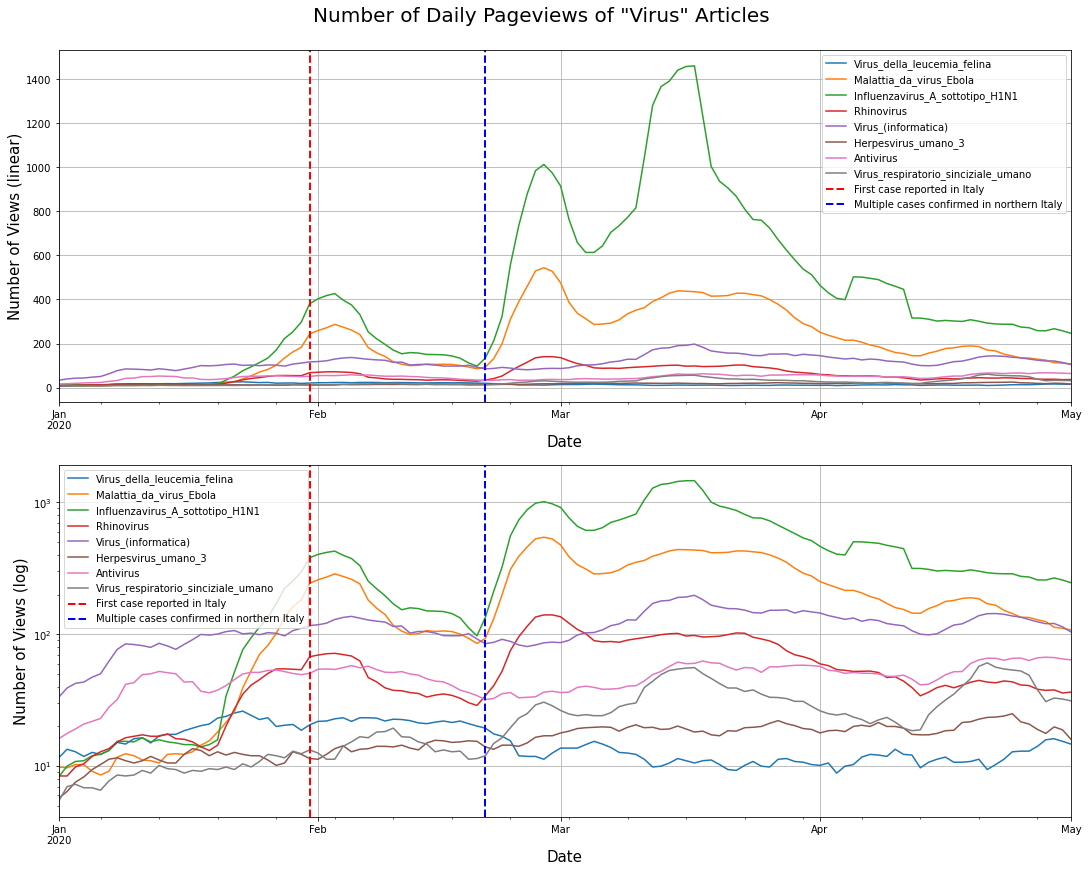

In [10]:
### ~ 3.2.2

import matplotlib.pyplot as plt
# This paramter will apply grid on all following plots
plt.rcParams['axes.grid'] = True

plt.figure(figsize=(14,3))

# prep df for plotting 
articles_virus_plot = articles_virus.T.rolling('7D').mean() # transpose df
article_names = articles_virus_plot.columns

# plot
fig, ax = plt.subplots(2,constrained_layout = True)

scale = ['linear','log']
legend = [True, False]

for i in range(0,2):

    articles_virus_plot['2020-01-01':'2020-05-01'].plot(y=article_names, kind = 'line', grid=True , ax=ax[i], legend=legend[i])

    ax[i].axvline('2020-01-31', color="red", linestyle="--", lw=2, label='First case reported in Italy')
    ax[i].axvline('2020-02-21', color="blue", linestyle="--", lw=2, label='Multiple cases confirmed in northern Italy')
    ax[i].set_yscale(scale[i])
    ax[i].set_xlabel('Date',fontsize = 15)
    ax[i].set_ylabel('Number of Views ({})'.format(scale[i]),fontsize = 15)
    ax[i].legend()
   

plt.suptitle('Number of Daily Pageviews of "Virus" Articles ', fontsize=20)
fig.set_figheight(12)
fig.set_figwidth(15) 
plt.show()


### ~ 3.2.3

It seems like most of the articles gained a rise in the number of views around the 2 marked dates. The rises were especially noticeable with `Influenzavirus_A_sottotipo_H1N1` and `Malattia_da_virus_Ebola`, which were also the top 2 most viewed articles around the mentioned dates as one can see in the graph above using the linear y-scale. This could be explained by the fact that the H1N1 virus and Ebola virus have been a topic of discussion in Europe a few years earlier. Both curves have a peak shortly after the first case was reported, as well as after multiple cases were confirmed

Furthermore, it seems like some of the other articles also gained a comparably less noticible spike in views. This can be visualized more clearly by using a logarithmic y-scale. With this scale, we can see that all curves have similar shapes, with an increase of views at the two dates. Overall, in order to reduce noise we applied a rolling average filter for both subplots to make the trend lines more clearer and used a window of 7 days.


### **Task 3.3**

Before we move on, let's make a final sanity check and analyze the distribution of pageviews over all articles in our dataset. You are given a function to calculate the **cumulative distribution function** (CDF) of a sample. The CDF is a function f(x) associated with a data sample. For each value x, f(x) represents the percentage of elements in your sample that have values smaller or equal to x (read more about it [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).
Your task is to:

1. Calculate the CDF of the distribution of pageviews across all days over articles. That is, a) calculate the total number of pageviews each article has received and then, b) calculate the CDF for these values.


2. Now plot this function using different scales for the x- and y-axis. You should plot it in 4 different ways:

    a. x-axis on linear scale, y-axis on linear scale
    
    b. x-axis on log scale, y-axis on linear scale
    
    c. x-axis on linear scale, y-axis on log scale
    
    d. x-axis on log scale, y-axis on log scale
    
3. **Discuss:** There is a pretty odd fact about the distribution of our data! Can you spot it and describe it? Which of the different plots (a-d) allows you to find this oddity? Why isn't this visible in the other plots?

---

**Hint:** You can use `plt.xscale` and `plt.yscale`.

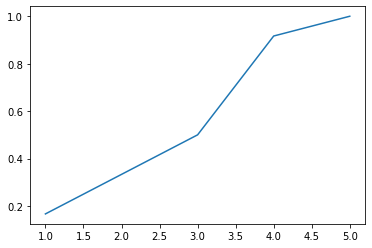

In [11]:
# This function is being given to you with a usage example :)! Make good use!

import numpy as np

def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    y = y
    x = list(range(1, max(vals) + 1))
    return x, y  

vals = np.array([1,2,3,4,1,2,4,3,4,4,5,4])
x, y = get_cdf(vals)
plt.plot(x, y)
plt.grid()
plt.show()

In [12]:
display(articles.sum(axis=1).head())

Articles
Khulna                          1006
Karim_Ansarifard                3332
Poldhu                          1346
Alice_(The_Sisters_of_Mercy)     640
Palmyra                          674
dtype: int64

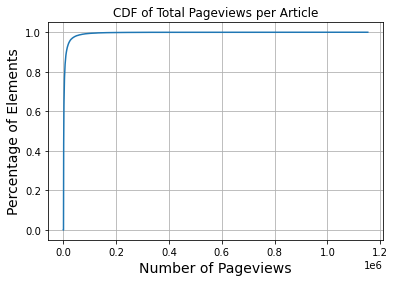

In [13]:
### ~ 3.3.1

tot_views_per_articles = articles.sum(axis=1)
vals = tot_views_per_articles
x, y = get_cdf(vals)
plt.plot(x, y)
plt.xlabel('Number of Pageviews',fontsize=14)
plt.ylabel('Percentage of Elements',fontsize=14)
plt.title('CDF of Total Pageviews per Article')
plt.show()


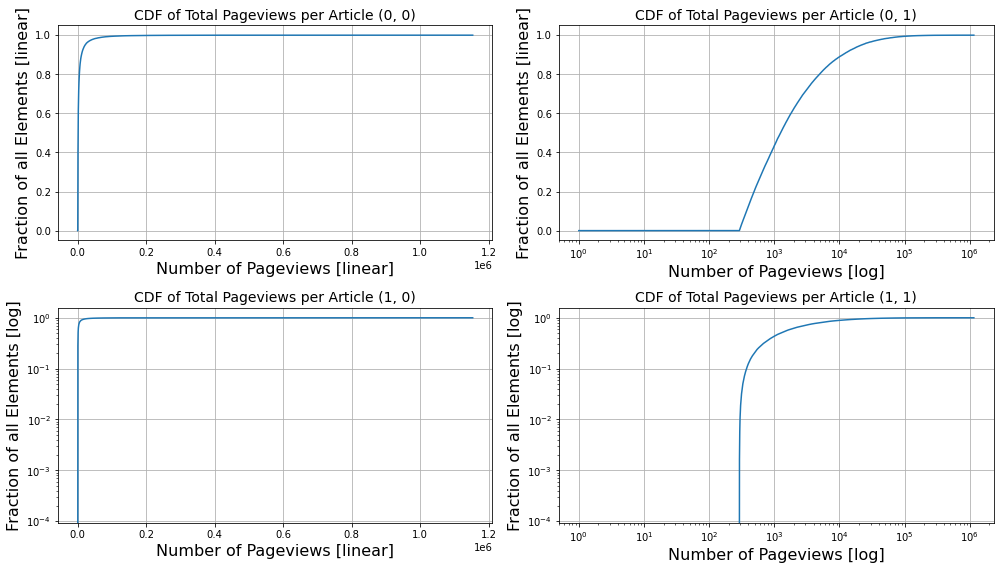

In [14]:
### ~ 3.3.2
scale_tuple = [['linear','linear'],['log','linear'],['linear','log'],['log','log']]
subplot_id = [(0,0),(0,1),(1,0),(1,1)]
fig, axs = plt.subplots(2,2)
for idx, scale in enumerate(scale_tuple):
    
    axs[subplot_id[idx]].plot(x,y)
    axs[subplot_id[idx]].set_title('CDF of Total Pageviews per Article '+'{}'.format(subplot_id[idx]),fontsize=14)
    axs[subplot_id[idx]].set_xscale(scale[0])
    axs[subplot_id[idx]].set_yscale(scale[1])
    axs[subplot_id[idx]].set_xlabel('Number of Pageviews '+'[{}]'.format(scale[0]),fontsize="16")
    axs[subplot_id[idx]].set_ylabel('Fraction of all Elements '+'[{}]'.format(scale[1]),fontsize="16")
    
fig.set_figheight(8)
fig.set_figwidth(14)   
fig.tight_layout()
plt.show()

In [15]:
# stats of the CDF

print('1st quantile: {:.0f}'.format(np.percentile(vals,25)))
print('2nd quantile (Median): {:.0f}'.format(np.percentile(vals,50)))
print('3rd quantile: {:.0f}'.format(np.percentile(vals,75)))
print('Min: {:.0f}'.format(vals.min()))
print('Mean: {:.0f}'.format(vals.mean()))
print('Max: {:.0f}'.format(vals.max()))

1st quantile: 564
2nd quantile (Median): 1244
3rd quantile: 3650
Min: 291
Mean: 5481
Max: 1152767


### ~ 3.3.3

By calculating some statistics about the values, we can get a better idea on the distribution of our data. The minimum is 291, the first quantile is 564, the median is 1244, the third quartile is 3650.5, and the mean is 5480, while the maximum is 1 152 767. We find that the maximum page view value is much larger than the mean value (210 times larger) and especially the median value (926). In addition, the max value is also much larger than even the 3rd quantile value, which means that the maximum value lies much higher than 75% of our data (3650 pageviews), the majority of our data. Since the CDF takes all input page view values into consideration, the graph will also account for the maximum value on the x-axis, which could be described as an outlier lying very far away from the rest of our data. Therefore, by using a linear x-axis like in subplots (0,0) and (1,0), the CDF curve is distorted by the maximum value value showing a very sharp rise in the curve at the beginning of the plot, which is then followed by a flat curve. In order to receive a better view of the characteristics of the curve and to reduce the dominance of the maximum value we can use a logarithmic x-axis like in subplot (0,1). Notice that although the subplot (1,1) uses a logarithmic x-axis it also has a logarithmic x-axis, which will does not exhibit the lower part of the graph, where we want to observe the curves transition from a zero fraction of all elements to a non-zero value. In sum, subplot (0,1) gives us the best representation of the cumulative distribution of our data.

When observing the plots, we notice that the shape looks concave and the CDF resembles the CDF of an exponential distribution ( with a high rate) starting at 291 views instead of 0. 

## *Step 4*: Analyzing Overall Pageview Volume


---
### **Task 4.1**

So far we have seen anecdotal examples. Now let’s move to the big picture! How did Wikipedia pageviews change in general? To gain a better understanding of how Wikipedia’s overall pageview volume has changed during the pandemic, you should do the following:

1. Calculate and visualize the pageviews trends across summed across **all** articles in Italian Wikipedia for the year 2020. (and only for 2020!). 
2. **Discuss**: what regular pattern (something that repeats over and over) do you see in the data?
3. Pre-process the data to remove this regular pattern and make the overall trend clearer. Repeat the plot with the processed data.

---

**Hint**: A convenient way to use `.groupby` alongside dates is to use the [`pd.Grouper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) class. Basically, it allows you to group by date periods given frequencies determined by the parameter `freq`. To read how to specify different types of frequencies, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Recall that, in order to turn an index, column index -- or pretty much anything -- into a timestamp, you can use  [`pd.to_timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_timestamp.html).

In [16]:
# Using consevative 7-color palette adapted for color blindness
# https://i.stack.imgur.com/zX6EV.png
vermillon = (213/255,94/255,0)
blue = (0,114/255,178/255)
bluish_green = (0,158/255,233/255)
yellow = (240/255,228/255,66/255)

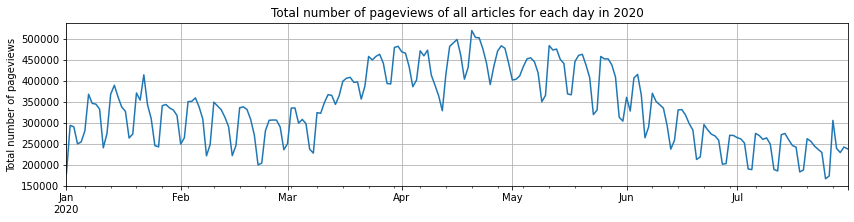

In [17]:
plt.figure(figsize=(14,3)) # change this if needed

### ~ 4.1.1
# Get a 2020 group with a year Grouper
grouped_articles = articles.sum().groupby(pd.Grouper(freq='YS'))
group_2020 = grouped_articles.get_group(pd.Timestamp('2020'))
group_2020.plot()
plt.ylabel("Total number of pageviews")
plt.title("Total number of pageviews of all articles for each day in 2020")
plt.show()

### ~ 4.1.2
Indeed, we can see a regular pattern in the data which has a weekly cyclical pattern. Looking at the time axis, we can observe that there are four cycles for each month on avergage, which can tell us that the tendency might be weekly. Then, if we look closer on when the minimums and maximums occur in the week, we can see that the minimums are often during week-ends (for example, the lowest minimum in April is on the Sunday 12th April 2020). We can also see that the minimum peaks are more spontaneous than the maximums which indicates an assymetry in the trend. We can easily deduct from this assymetry the link work-days/week-end.

So, the regular pattern that we see indicates that people request more pageviews during business days than during week-ends.

We can remove this weekly trend using `Grouper` class with a weekly frequency.

Another technique that can be used is the locally weighted regression (Lowess). This method is non-parametric and can be useful for assymetric regular pattern like the ones we have on the curve. 

A last technique uses seasonality by decomposing the time series and by plotting the remaining trend. We do this with the help of the `statsmodels` library. 

All three techniques are shown in the following subplots. We chose the technique using the `Grouper` class because its better suited for this case of weekly trend although all thechniques lead to very similar results. The two last techniques use `statsmodels` module, which is not included in ada environment but is included in built-in conda environment. So you must `conda install` this module if you are using ada environment.

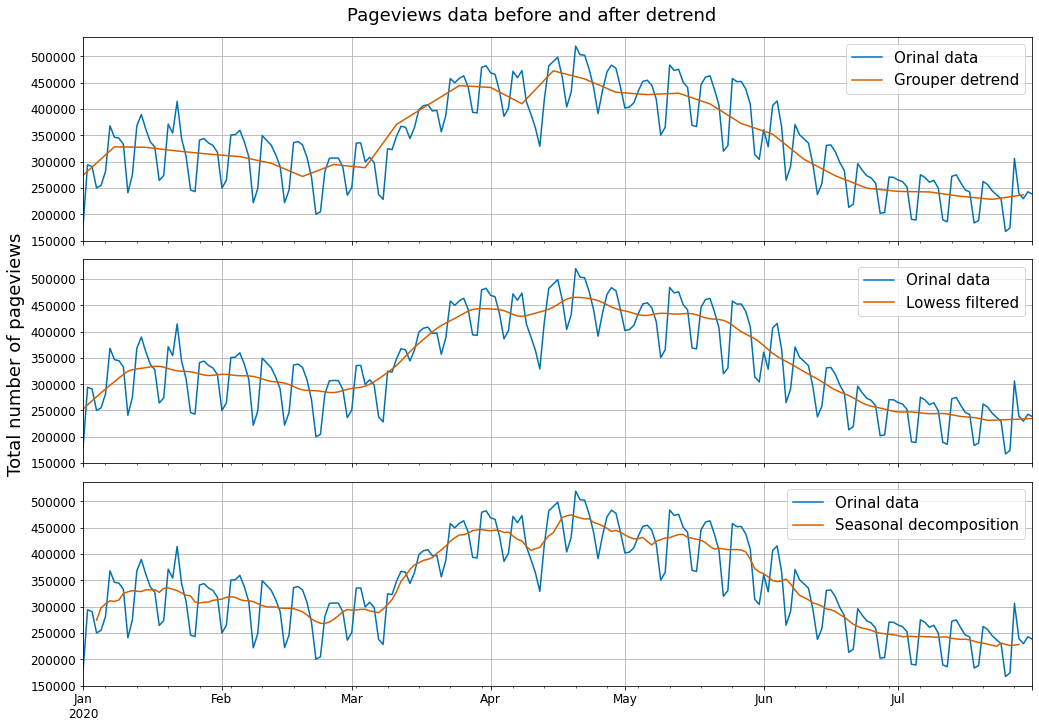

In [18]:
### ~ 4.1.3

# statsmodels package is not included in ada environement
import statsmodels.api as sm 
from statsmodels.nonparametric.smoothers_lowess import lowess

# Grouper with week frequency
group_2020_grouper7d = group_2020.groupby(pd.Grouper(freq='7d')).mean()
# Lowess bellshape technique 
group_2020_lowess =  pd.Series(lowess(group_2020,range(group_2020.shape[0]),frac=0.1)[:,1],index=group_2020.index)
# Seasonal decomposition technique 
group_2020_season = sm.tsa.seasonal_decompose(group_2020,model = 'additive').trend


# Plot
fig, ax = plt.subplots(3,1,sharex=True, sharey=True, constrained_layout=True,figsize=(14,10))

[group_2020.plot(c=blue, ax=ax[i]) for i in range(3)]
group_2020_grouper7d.plot(c=vermillon, ax=ax[0])
group_2020_lowess.plot(c=vermillon, ax=ax[1])
pd.Series(group_2020_season).plot(c=vermillon, ax=ax[2])

ax[0].legend(['Orinal data','Grouper detrend'],fontsize=15)
ax[1].legend(['Orinal data','Lowess filtered'],fontsize=15)
ax[2].legend(['Orinal data','Seasonal decomposition'],fontsize=15)

[ax[i].tick_params(axis='y',labelsize=12) for i in range(3)]

plt.xticks(fontsize=12)
fig.text(-0.02,0.35, "Total number of pageviews", fontsize=18,rotation = 90)
fig.suptitle('Pageviews data before and after detrend', fontsize=18)
plt.show()

### **Task 4.2**

To get an even clearer picture, your task now is to compare the pageview time series of the current year (2020) with the time series of the previous year (2019).

1. Make a visualization where the two years are somehow "aligned", that is, where it is possible to compare the same time of year across the two years. Additionally, your visualization should highlight the date on which the nationwide lockdown started in Italy, 9 March 2020. Preprocess each one of the time series (for each year) the same way you did in Task 4.1.

3. **Discuss:** What changed from 2019 to 2020? Form and justify hypotheses about  the reasons behind this change.

---

**Hint**: In order to use two different y-axes in the same plot, you can use plt.twiny() or ax.twinx() (the latter if you are using the subplots environment;  [See this example](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/two_scales.html)).

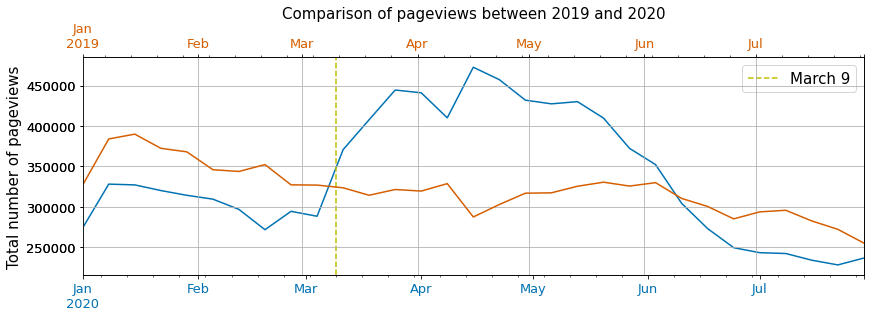

In [19]:
### ~ 4.2.1
group_2019 = grouped_articles.get_group(pd.Timestamp('2019'))
group_2019_grouper7d = group_2019.groupby(pd.Grouper(freq='7d')).mean()

# Plot
ax = group_2020_grouper7d.plot(c=blue,figsize=(14,4),label='_nolegend_')
ax.axvline(pd.to_datetime("2020-03-09"), linestyle='--', c='y', label='March 9')
ax.tick_params(axis='x', labelcolor=blue, labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.grid()
ax.legend(fontsize=15)

ax2 = ax.twiny()
ax2.tick_params(axis='x', labelcolor=vermillon, labelsize=13)
ax2.tick_params(axis='y', labelsize=13)
ax2.set_xlabel('Comparison of pageviews between 2019 and 2020', fontsize=15)
group_2019_grouper7d[:(group_2020_grouper7d.shape[0])].plot(c=vermillon)

plt.ylabel('Total number of pageviews', fontsize=15)
plt.show()

We can notice that the x twin axes coincides until end of February due to the fact that Februrary 2020 counts one more day in its year.

### ~ 4.2.2
Although the "2019 Trend" was higher at the start of year than the "2020 Trend", around the start of the lockdown we have an immediate spike in the number of page views for 2020, which remain higher than 2019 for around 80 days. The number of pageviews in 2020 then goes down under the number of pageviews of 2019 until present day.

The 2020 increase on March 9 coincides well with the first european lockdown in Italy, so both events might be correlated. Indeed, people staying home might have spent more time on internet browsing on Wikipedia because they needed information that they would usually get from work or friends. People may have also used Wikipedia simply to pass the time !

Interesting data could be time spent on internet by italian people in 2020. If the same increase in March 9 happens in this set of data, that would mean people used more internet during lockdown in general and so the Wikipedia browsing increase is logical. In this case, it is complicate to say that lockdown made the pageviews increase on Wikipedia only and that it's not a general increase in internet use. To know more about Wikipedia situation, for example, we can compare the relative increase in Wikipedia pageviews with the realtive increase in internet use in general.  

We can also hypothesize that since many people are in lockdown, they are spending more time searching the web from their desktop computers instead of their mobile phones. So, another interesting set of data could be the Wikipedia pageviews on mobile phones. Indeed, if the increase of pageviews on desktop compensates for a decrease of pageviews on mobile phones, then we could say that people just changed their devices' percentage of usage and total pageviews (mobile + desktop) would remains the same (considering that people use Wikipedia the same way on both device). On the other hand, if the total of pageviews (mobile + desktop) is higher, the hypothesis that people use Wikipedia to gather information that they would ususally get from work or friends, holds better. 

## *Step 5*: Fiddling with Topics

---
### **Task 5.1**

We now turn to a different question: what topics were impacted by the lockdown? 
To start unpacking this question, your task now is to aggregate, for each day, all pageviews that went to each one of the 64 topics. 

There are multiple ways to do this, but for the sake of this exercise, you must create a dataframe where each row contains the number of pageviews a topic obtained on a given day! Example:

~~~
index       date                   views             
TOPIC1      2019-01-01             101              
TOPIC1      2019-01-02             151             
(...)       (...)                  (...)
TOPICK      2019-01-01             1010              
TOPICK      2019-01-02             2123            
(...)       (...)                  (...)
~~~

---

**Hint**: You've should find a way to make the index in the dataframe with the topics be the same as the index in the dataframes with the articles. See the file `mapping.pickle`.

**Hint**: You may want to use `.melt`.

We can easily translate english articles from the `articles` dataframe to italian articles using the map function and the dictionnary given. We could have used the `rename` function from `pandas` but it is slower. We could also have translated the italian names to english ones(instead of english to italian) but note that the articles column will disappear anyway in the following part, so the language is not important. We also print the number of **NaN** resulting from the translation indicating that no key was found for the article name. We also see that the size of `mapping` is equal to the size of topic so that the dictionnary was probably made for topics table.

In [20]:
### ~ 5.1.1
topics.index = topics.index.map(mapping)

print("Number of Nan index indicating that dictionnary mapping failed: %d"
      %topics.index.isnull().sum())

display(topics.head())

Number of Nan index indicating that dictionnary mapping failed: 0


,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,Geography.Regions.Americas.North America,...,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia
Articles,,,,,,,,,,,,,,,,,,,,,
Dietetica_cinese,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Battaglia_di_Naisso,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Battaglia_di_Stoke_Field,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
Lissotriton_vulgaris,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vicente_Aleixandre,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
display(articles.head())

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31
Articles,,,,,,,,,,,,,,,,,,,,,
Khulna,0,2,1,0,0,2,0,2,0,1,...,0,1,1,0,1,1,0,2,1,2
Karim_Ansarifard,1,5,1,1,1,3,6,4,5,6,...,2,2,0,1,2,0,1,0,0,0
Poldhu,0,0,1,1,0,1,0,2,2,3,...,0,2,2,0,0,0,2,1,2,1
Alice_(The_Sisters_of_Mercy),0,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Palmyra,1,4,0,0,0,2,11,2,0,0,...,0,0,1,0,0,0,1,0,0,0


We can see the problem as a **matrix multiplication problem**. Indeed, we want to do the dot product of each column of `topics` dataframe and each column of `articles` dataframe (see dataframes above). As we will melt the topics, we want to have the topics as columns (date as rows). So we want to have $[dates \times articles] * [articles \times topics] = [dates \times topics]$. So, we simply take the transpose of `articles` dataframe and multiply it to `topics` dataframe.

In [22]:
# Matrix multiplication
date_topics = articles.loc[topics.index,:].transpose().dot(topics)
display(date_topics.head())

,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,Geography.Regions.Americas.North America,...,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia
2018-01-01,317,2517,7126,16048,513,3538,2206,2994,12370,19070,...,993,1410,1792,6636,3032,949,6761,17506,7868,975
2018-01-02,465,5026,11932,23892,1245,6063,3748,6069,17811,27573,...,2695,2363,5111,10336,4697,1406,10129,20178,12967,2618
2018-01-03,565,4405,11835,23036,1092,5834,4155,6087,17743,27196,...,3024,2659,5882,10973,4641,1352,10584,20340,12488,1776
2018-01-04,467,5073,11756,24165,1032,5553,4071,6480,20312,28241,...,3281,2569,6113,10923,4466,1489,9553,23561,12745,2195
2018-01-05,598,4628,13180,20838,978,5771,3802,6097,19309,26809,...,3129,2291,5505,9954,3982,1494,8261,20487,11645,1831


The above instruction checks several things. First, it checks that the articles in `articles` dataframe contains each of the articles in `topics` dataframe with `loc` function (or indexing). Then, if the last condition is true and no error arise, it will make sure that each article will match when multiplying the dataframes (articles columns of `articles.tranpose()` = articles rows of `topics`). Finally it will matrix multiply the dataframes and replace the index with the dates and keep the topics as columns.

In [23]:
# Melted form of date_topics
melted_date_topics = pd.melt(date_topics.reset_index(), id_vars=['index'], value_vars=topics.columns)
# Rearranging column names, index, etc...
melted_date_topics = melted_date_topics[['variable','index','value']]\
                    .rename(columns={'variable':'index','index':'date','value':'views'})
display(melted_date_topics.head())

,index,date,views
0,Geography.Regions.Asia.Central Asia,2018-01-01,317
1,Geography.Regions.Asia.Central Asia,2018-01-02,465
2,Geography.Regions.Asia.Central Asia,2018-01-03,565
3,Geography.Regions.Asia.Central Asia,2018-01-04,467
4,Geography.Regions.Asia.Central Asia,2018-01-05,598


### **Task 5.2**

Now to the **grand finale**. We will consider two periods:
- the 35 days before the quarantine started (in the 9th of March); and 
- the 34 days after the quarantined started (including the day of the quarantine itself).

Create a visualization where you can compare, for each topic, the mean **number of views** in the aforementioned periods (that is, before and after the quarantine started). **Although there is a very large number of topics, your visualization should be a compact panel, small enough to fit on an A4 page.**

---

**Hint**: [Hoooray](https://seaborn.pydata.org/examples/index.html).

The following function creates two series for the two periods and merge them into a dataframe. We then melt the two periods so that `seaborn catplot` function understands that before and after periods correspond to the two bars that we want to compare for each topics. We also sort the topics when calling the function to get a better visualization and comparison. The pageviews values axis is log scaled so that we better see the topics with smaller number of pageviews. 

In [24]:
import seaborn as sns

# We use a simple function as task 5.2 and 5.3 use the same code
def grand_finale(date_topics, xlabel):
    views_mean_before = date_topics["February 3, 2020":"March 8, 2020"].mean().rename('Before March 9')
    views_mean_after = date_topics["March 9, 2020":"April 11, 2020"].mean().rename('After March 9')
    
    views_mean = views_mean_before.rename_axis('topics').to_frame().join(views_mean_after).reset_index()
    views_mean = views_mean.melt(id_vars=['topics'], value_vars=['Before March 9', 'After March 9'])

    # Plot
    g = sns.catplot(
        data=views_mean, kind="bar", 
        x="value", y="topics", hue="variable",orient='h', height=20, aspect = 0.8,legend=False
    )
    g.set(xscale="log")
    plt.tick_params(labelsize=15)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel('Topics', fontsize=20)
    plt.legend(loc='center right',fontsize=15, frameon=False)
    plt.show()

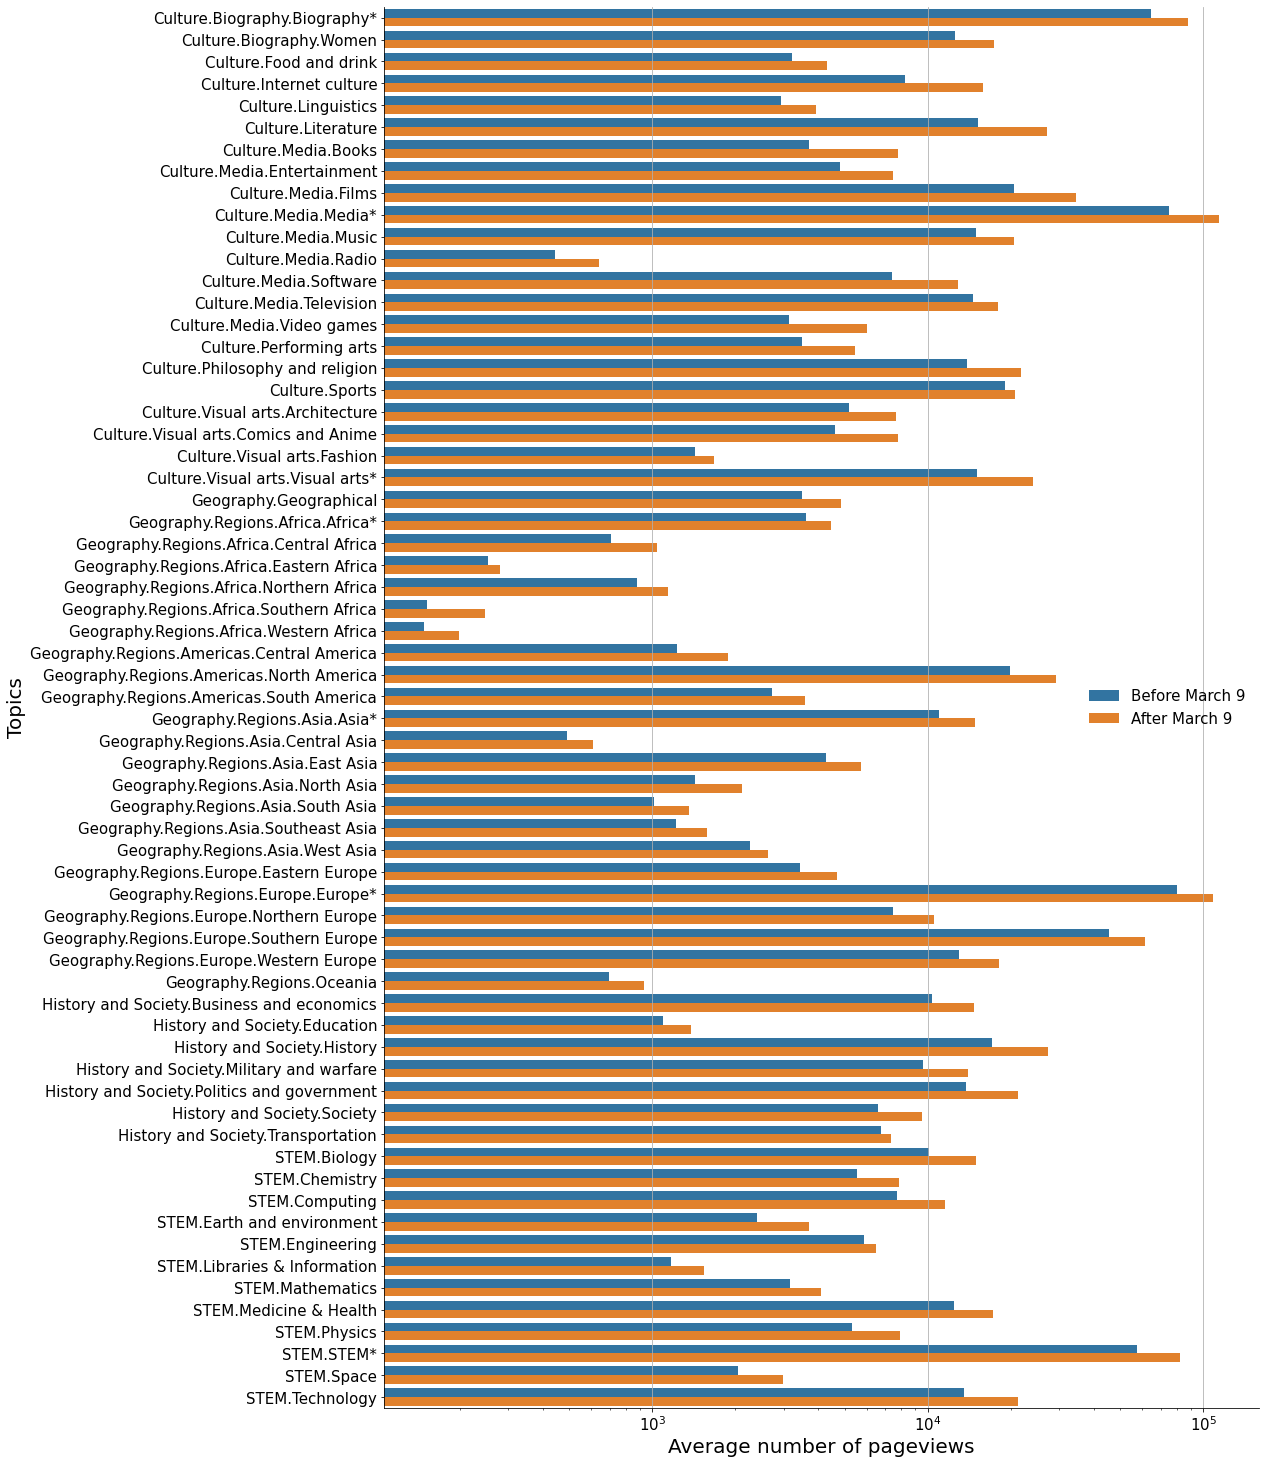

In [25]:
### ~ 5.2
# Sorted topics for better visualization and comparison
grand_finale(date_topics.reindex(sorted(date_topics.columns), axis=1), 'Average number of pageviews')

### **Task 5.3**

Notice that the previous analysis fails to isolate the increases or decreases in each individual topic from the overall increases or decreases in pageviews across Wikipedia in general. That is, it could be that all topics gained/lost pageviews, but some did so more than articles in general, while others did so less than articles in general. To address this issue, you should:


1. Normalize the pageviews counts in the dataframe created in Task 5.1. Instead of using the raw number of pageviews, you should compute, for each day, what fraction of all pageviews a topic received.

2. Create a second visualization that shows not the **raw** value of pageviews before and after, but the **relative** value that you just calculated.

3. **Discuss:** According to Task 5.2, what topics have increased in terms of the raw, absolute number of pageviews after the quarantine started? In relative, rather than absolute, terms, do these findings still hold? If not, what has changed?

---

In [26]:
### ~ 5.3.1
date_topics_norm = date_topics.divide(date_topics.sum(axis=1),axis=0)

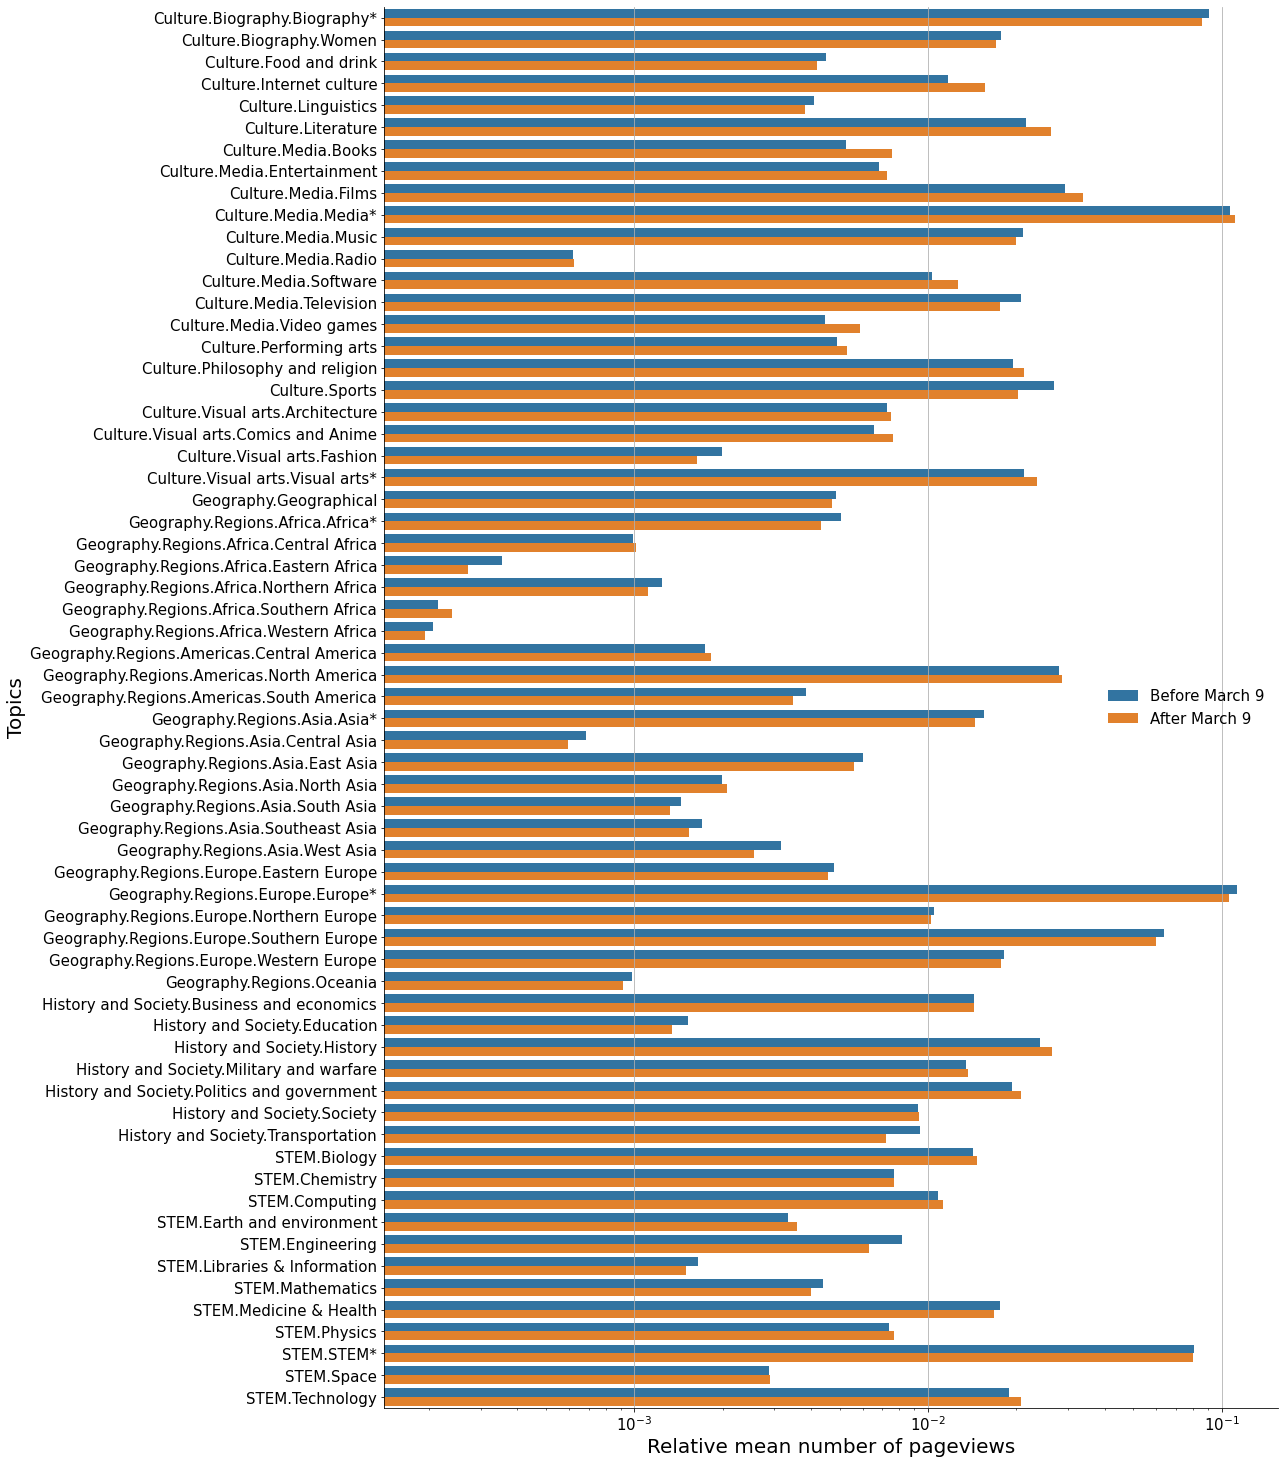

In [27]:
### ~ 5.3.2
grand_finale(date_topics_norm.reindex(sorted(date_topics_norm.columns), axis=1),\
             'Relative mean number of pageviews')

### ~ 5.3.3
Using raw data, we see that most of topics pageviews increase almost 50% from before to after March 9. The most drastic changes are found in the following topics: 

In [28]:
views_mean_before = date_topics["February 3, 2020":"March 8, 2020"].mean().rename('Before March 9')
views_mean_after = date_topics["March 9, 2020":"April 11, 2020"].mean().rename('After March 9')
views_mean = views_mean_before.rename_axis('Topics').to_frame().join(views_mean_after)
top_increases = ((views_mean['After March 9']-views_mean['Before March 9'])/views_mean['Before March 9'])\
                .sort_values(ascending=False).rename('Relative increase')
display(top_increases.to_frame().head(10))

,Relative increase
Topics,
Culture.Media.Books,1.094618
Culture.Internet culture,0.922169
Culture.Media.Video games,0.921762
Culture.Literature,0.770965
Culture.Media.Software,0.747473
Culture.Visual arts.Comics and Anime,0.693403
Culture.Media.Films,0.675231
Geography.Regions.Africa.Southern Africa,0.613220
Culture.Visual arts.Visual arts*,0.605741


In [29]:
views_mean_before = date_topics_norm["February 3, 2020":"March 8, 2020"].mean().rename('Before March 9')
views_mean_after = date_topics_norm["March 9, 2020":"April 11, 2020"].mean().rename('After March 9')
views_mean = views_mean_before.rename_axis('Ropics').to_frame().join(views_mean_after)
top_increases = ((views_mean['After March 9']-views_mean['Before March 9'])/views_mean['Before March 9'])\
                .sort_values(ascending=False).rename('Relative increase (normed)')
display(top_increases.to_frame().head(10))

,Relative increase (normed)
Ropics,
Culture.Media.Books,0.431235
Culture.Internet culture,0.333185
Culture.Media.Video games,0.314115
Culture.Media.Software,0.224147
Culture.Literature,0.216856
Culture.Visual arts.Comics and Anime,0.160108
Culture.Media.Films,0.148974
Geography.Regions.Africa.Southern Africa,0.118513
Culture.Visual arts.Visual arts*,0.111814


So we can see that culture topics are the ones which increased the most when calculating the absolute number of pageviews. Within culture topics, entertainment topics have the highest changes. We also see that top 10 increases mostly remain the same when normalizing but the relative increase totally drops when normalizing. So we can't see a huge difference between before and after the lockdown anymore. For example, `Europe*` topic went from 36% increase from before to after March 9, to 5% decrease when normalizing the data (not shown in the above dataframes). 